In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/TeePublic_review.csv', encoding='ISO-8859-1')


In [ ]:
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5.0
1,1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5.0
2,2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5.0
3,3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5.0
4,4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4.0


In [ ]:
df.tail()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
90311,90311,US,37.09024,-95.712891,2022,5,2023 00:00:00,5 star experience!,"Ordering was easy, pricing was great and quali...",5.0
90312,90312,US,37.09024,-95.712891,2022,5,2023 00:00:00,I ordered 2X and I received XXL,I ordered 2X and I received XXL.The tee shirts...,1.0
90313,90313,US,37.09024,-95.712891,2022,5,2023 00:00:00,Extremely happy,I am impressed how fast I got my orders. I am ...,5.0
90314,90314,US,37.09024,-95.712891,2022,5,2023 00:00:00,I had a sizing issue on shirts I hadï¿½ï¿½ï¿½,I had a sizing issue on shirts I had ordered f...,5.0
90315,90315,US,37.09024,-95.712891,2022,5,2023 00:00:00,My 1st experience is so far a greatï¿½ï¿½ï¿½,My 1st experience is so far a great one. I hig...,NaN


# Pre-processing and EDA

In [ ]:
df.describe()

,reviewer_id,latitude,longitude,date,month,review-label
count,90316.000000,90316.000000,90316.000000,90316.000000,90316.000000,90315.000000
mean,45157.500000,37.123105,-87.059792,2022.289528,7.819102,4.508908
std,26072.127793,12.200208,42.070620,0.453692,3.270669,1.103716
min,0.000000,-40.900557,-159.777671,2021.000000,1.000000,1.000000
25%,22578.750000,37.090240,-95.712891,2022.000000,5.000000,5.000000
50%,45157.500000,37.090240,-95.712891,2022.000000,8.000000,5.000000
75%,67736.250000,37.090240,-95.712891,2023.000000,11.000000,5.000000
max,90315.000000,64.963051,174.885971,2023.000000,12.000000,5.000000


In [ ]:
df.isnull().sum()

reviewer_id          0
store_location       0
latitude             0
longitude            0
date                 0
month                0
year                 0
title                3
review            9889
review-label         1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

reviewer_id       0
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64

In [ ]:
df["store_location"].value_counts()

store_location
US    69438
CA     6352
AU     2093
GB     1122
DE      224
      ...  
TC        1
IM        1
BH        1
SR        1
GP        1
Name: count, Length: 99, dtype: int64

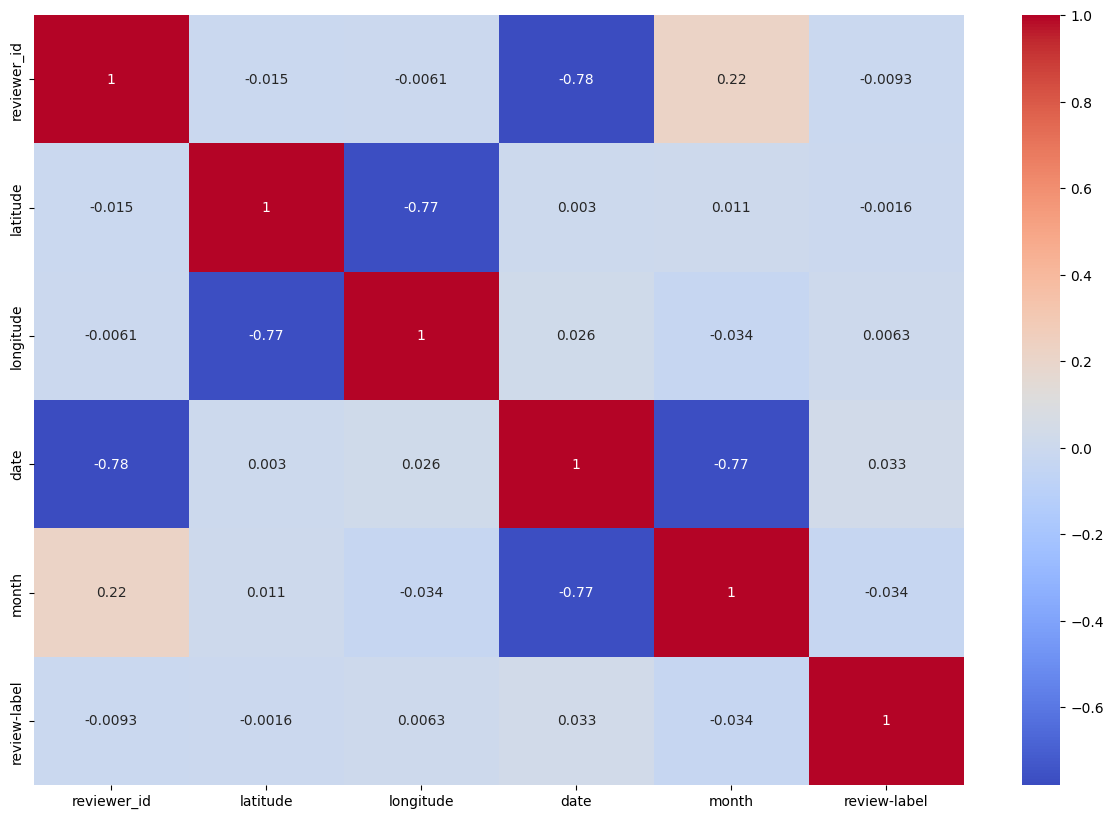

In [ ]:
# Exclude non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df['review-label'].value_counts()

review-label
5.0    62823
4.0     6085
1.0     4688
3.0     4132
2.0     2695
Name: count, dtype: int64

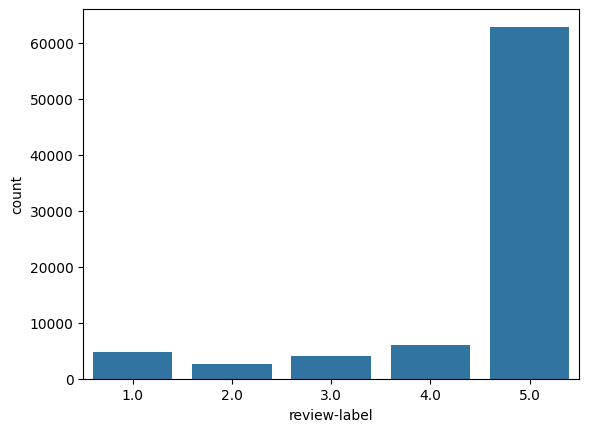

In [ ]:

# Target Variable Analysis
sns.countplot(x='review-label', data=df)
plt.show()

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['review-label'] == 5.0]
df_minority_4 = df[df['review-label'] == 4.0]
df_minority_3 = df[df['review-label'] == 3.0]
df_minority_2 = df[df['review-label'] == 2.0]
df_minority_1 = df[df['review-label'] == 1.0]

# Upsample minority classes
df_minority_4_upsampled = resample(df_minority_4,
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),    # To match majority class
                                   random_state=42) # Reproducible results
df_minority_3_upsampled = resample(df_minority_3,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)
df_minority_2_upsampled = resample(df_minority_2,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)
df_minority_1_upsampled = resample(df_minority_1,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_4_upsampled, df_minority_3_upsampled,
                          df_minority_2_upsampled, df_minority_1_upsampled])

# Display new class counts
print(df_upsampled['review-label'].value_counts())


review-label
5.0    62823
4.0    62823
3.0    62823
2.0    62823
1.0    62823
Name: count, dtype: int64


In [ ]:
# Save the DataFrame to a CSV file
df_upsampled.to_csv('/content/new_review.csv', index=False)

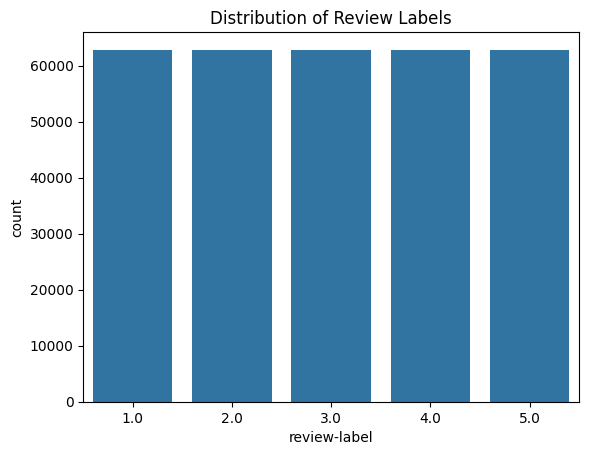

In [ ]:
# Plot the distribution of review labels
sns.countplot(x='review-label', data=df_upsampled)
plt.title('Distribution of Review Labels')
plt.show()

# Model training

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df_unsampled=pd.read_csv('/content/new_review.csv')

In [ ]:
# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to clean the text using NLTK
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Strip leading and trailing spaces

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Stemming or Lemmatization (choose one)
    # Stemming
    tokens = [ps.stem(word) for word in tokens]

    # Lemmatization
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [ ]:
# Apply cleaning function to the review column
df_unsampled['cleaned_text'] = df_unsampled['review'].apply(clean_text)

In [ ]:
# Display the first few rows to verify the cleaning
df_unsampled[['review', 'cleaned_text']].head()

,review,cleaned_text
0,I had an order that was lost in transit. When ...,order lost transit call help custom servic rep...
1,I ordered the wrong size tee and had difficult...,order wrong size tee difficulti return websit ...
2,These guys offer the best customer service in ...,guy offer best custom servic retail product hi...
3,Looked for an obscure phrase on a shirt. Teepu...,look obscur phrase shirt teepubl process easi ...
4,Always top notch customer service. Never have ...,alway top notch custom servic never issu order...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_unsampled['cleaned_text'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Labels
y = df_unsampled['review-label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Model Prediction
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6792735144771819
              precision    recall  f1-score   support

         1.0       0.71      0.76      0.73     12583
         2.0       0.67      0.66      0.67     12573
         3.0       0.61      0.60      0.61     12559
         4.0       0.64      0.57      0.60     12527
         5.0       0.76      0.80      0.78     12581

    accuracy                           0.68     62823
   macro avg       0.68      0.68      0.68     62823
weighted avg       0.68      0.68      0.68     62823



In [ ]:
# Assuming X_train_tfidf and y_train are your training data and labels

train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")


Training Accuracy: 0.6963413081196377


# Prediction on new sentence text.

In [ ]:
# Function to clean new review texts
new_reviews = ["The product quality was fantastic!", "The service was okay."]
new_reviews_cleaned = [clean_text(review) for review in new_reviews]

# Transform new reviews using the same vectorizer
new_reviews_transformed = vectorizer.transform(new_reviews_cleaned)

# Predict sentiment labels for new reviews
predictions = model.predict(new_reviews_transformed)
print(predictions)  # Predicted sentiment labels


[5. 3.]
